# Introduction to plotting


It uses the most common plotting packages used by python, `matplotlib`

To start with, we will inspect data called the **Anscombe's quartet** https://en.wikipedia.org/wiki/Anscombe%27s_quartet. This will demonstrate the need of visualising the data.


In [13]:
import pandas as pd

# format for floats
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_excel(io="PlottingData.xls", sheet_name='anscombe', index_col='ID')
df.head()

,dataset,x,y
ID,,,
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


# Matplotlib

%matplotlib inline is a **magic** command.<br>
It means when plotting matplotlib charts, embed them directly into the notebook. Another option is `notebook`.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# plot only dataset 'I'
fltr = df['dataset'] == 'I'
df_I = df[fltr]

# extract the x and y values
xI = df_I['x']
yI = df_I['y']

# plot
plt.plot(xI, yI)
plt.plot(xI, yI, 'o')

## Plot all 4 datasets on a single figure

- Extract the 4 datasets from the dataframe
- Create a figure & add 4 sub plots to the figure
- Plot each dataset on its corresponding sub_plot
- Add titles 

In [19]:
# Extract the 4 datasets from the dataframe

df_I = df[df['dataset'] == 'I']
df_II = df[df['dataset'] == 'II']
df_III = df[df['dataset'] == 'III']
df_IV = df[df['dataset'] == 'IV']

print(df_I.describe())

print(df_II.describe())

print(df_III.describe())

          x     y
count 11.00 11.00
mean   9.00  7.50
std    3.32  2.03
min    4.00  4.26
25%    6.50  6.31
50%    9.00  7.58
75%   11.50  8.57
max   14.00 10.84
          x     y
count 11.00 11.00
mean   9.00  7.50
std    3.32  2.03
min    4.00  3.10
25%    6.50  6.70
50%    9.00  8.14
75%   11.50  8.95
max   14.00  9.26
          x     y
count 11.00 11.00
mean   9.00  7.50
std    3.32  2.03
min    4.00  5.39
25%    6.50  6.25
50%    9.00  7.11
75%   11.50  7.98
max   14.00 12.74


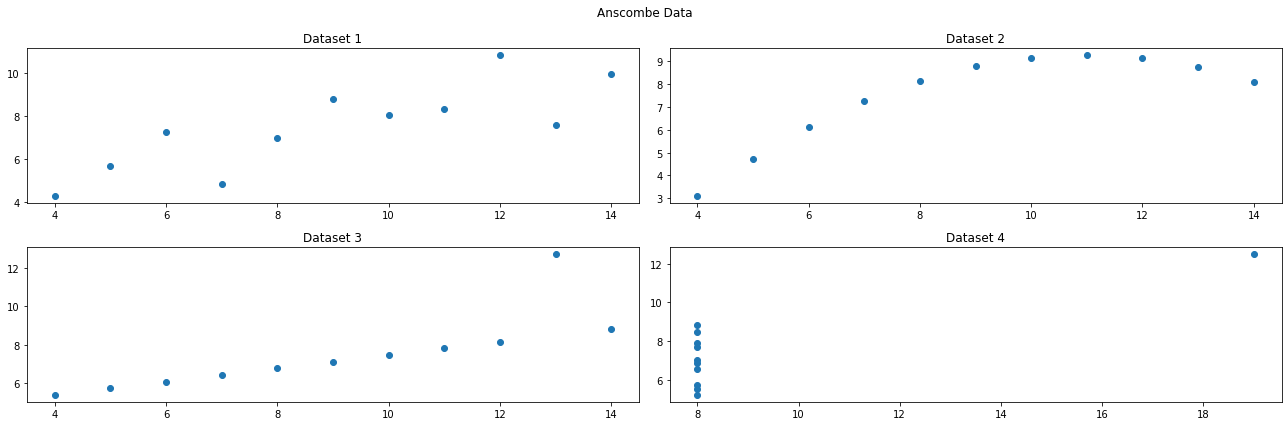

In [24]:
# Create a Figure
fig = plt.figure(figsize=(18,6))

# Add 4 subplots
# subplot takes (num rows, num columns, plot location)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# plot each dataset on its corresponding sub_plot
ax1.plot(df_I['x'], df_I['y'], 'o')
ax2.plot(df_II['x'], df_II['y'], 'o')
ax3.plot(df_III['x'], df_III['y'], 'o')
ax4.plot(df_IV['x'], df_IV['y'], 'o')

# Add some titles etc
ax1.set_title('Dataset 1')
ax2.set_title('Dataset 2')
ax3.set_title('Dataset 3')
ax4.set_title('Dataset 4')

# Title of entire figure
fig.suptitle("Anscombe Data")

# Use a tight layout
fig.tight_layout()

# Anatomy of a figure

<img style="float: left; margin-top: 0" width="300" src="./Images/subplot.png">
<img style="float: centre; margin-top: 0" width="300" src="./Images/figure.webp">
<br>


**NOTE** 
- difference between `axes` and `axis`
- both pronounced the same
- one is singlular, one is plural
- both refer to different parts of a figure
- axes contains mulitple axis
- here axes contains and x-axis and a y-axis

# Leveraging Matplotlib

In [30]:
df = pd.read_excel(io="PlottingData.xls", sheet_name='tips', index_col='ID')
df.head()

bills = df['total_bill']
bills_sorted = bills.sort_values()
bills_sorted.tail(10)

ID
95    40.17
184   40.55
142   41.19
197   43.11
102   44.30
182   45.35
156   48.17
59    48.27
212   48.33
170   50.81
Name: total_bill, dtype: float64

## Histograms

Text(0, 0.5, 'Frequency')

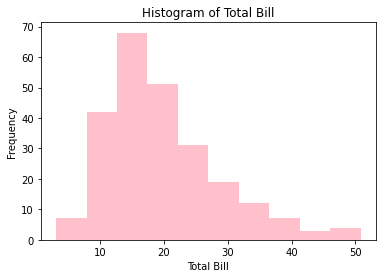

In [35]:

x_data = df['total_bill']

hist_plot = plt.figure()

ax1 = hist_plot.add_subplot(1,1,1)
ax1.hist(x = x_data, bins=10, color='pink')
ax1.set_title('Histogram of Total Bill')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Frequency')


## Scatterplot

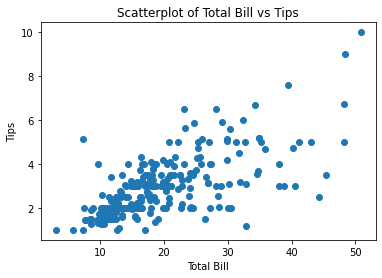

In [38]:
scatter_plot = plt.figure()

x_data = df['total_bill']
y_data = df['tip']

ax1 = scatter_plot.add_subplot(1,1,1)

ax1.scatter(x = x_data, y = y_data)
ax1.set_title('Scatterplot of Total Bill vs Tips')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Tips');



## Boxplots

Used when a discrete variable is plotted against a continuous variable.
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed. A box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median

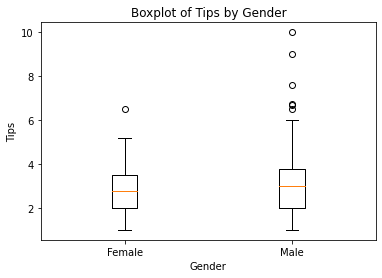

In [39]:
box_plot = plt.figure()

female_tips = df[df['sex'] == 'Female']['tip']
male_tips = df[df['sex'] == 'Male']['tip']

ax1 = box_plot.add_subplot(1,1,1)
ax1.boxplot(x = [female_tips, male_tips], labels=['Female', 'Male'])
ax1.set_title('Boxplot of Tips by Gender');
ax1.set_xlabel('Gender')
ax1.set_ylabel('Tips');



## Multivariate Data

- showing data depending on different labels

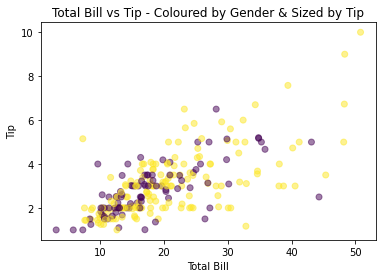

In [41]:
# recode gender to a colour value
def recode_gender(g):
    if g == 'Female':
        return 0
    else:
        return 1
    
df['Gender(Colour)'] = df['sex'].apply(recode_gender)

scatter_plot = plt.figure()

ax1 = scatter_plot.add_subplot(1,1,1)
ax1.scatter(x=df['total_bill'], y=df['tip'], c=df['Gender(Colour)'], alpha = 0.5)


ax1.set_title('Total Bill vs Tip - Coloured by Gender & Sized by Tip')
ax1.set_xlabel('Total Bill')
ax1.set_ylabel('Tip');


# Seaborn
We will demonstrate Seaborn's functionality using the same dataframe.

In [42]:
import seaborn as sns


## Histograms

Kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation, i.e., a non-parametric method to estimate the probability density function of a random variable based on kernels as weights. KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

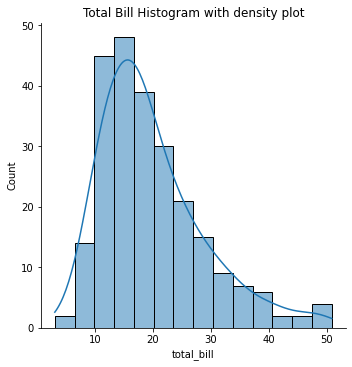

In [43]:
ax1 = sns.displot(data = df['total_bill'], kind = 'hist', kde=True).set(title='Total Bill Histogram with density plot')


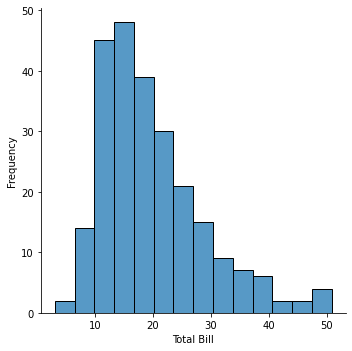

In [44]:
ax1 = sns.displot(data = df['total_bill'])
plt.xlabel('Total Bill')
plt.ylabel('Frequency');

## Density Pot

**Kernel Density Estimation**

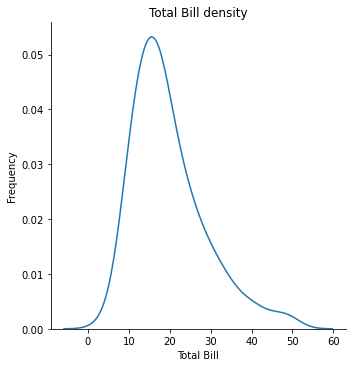

In [45]:
ax1 = sns.displot(data = df['total_bill'], kind='kde').set(title='Total Bill density')


plt.xlabel('Total Bill')
plt.ylabel('Frequency');


## Rug Plots

- 1 dimensional representation of a variables distribution
- usually used with other plots to enhance visualization

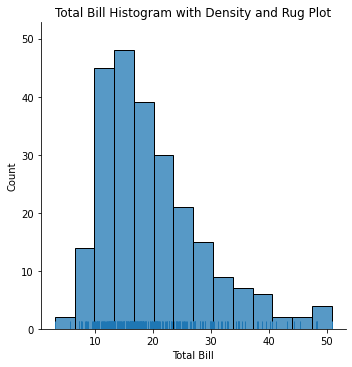

In [46]:
ax1 = sns.displot(data = df['total_bill'], rug=True).set(title='Total Bill Histogram with Density and Rug Plot')
plt.xlabel('Total Bill');


## Bar Plots

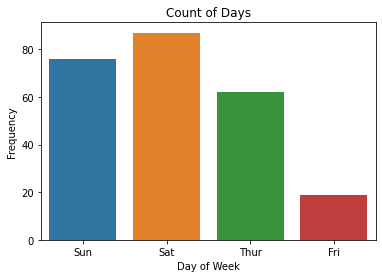

In [47]:
ax1 = sns.countplot(x='day', data=df)
ax1.set_title('Count of Days')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Frequency');


## Scatterplot

- No `scatter` function in `seaborn`, use `regplot` instead.
- use `fit_reg=False` to toggle regression line on/off

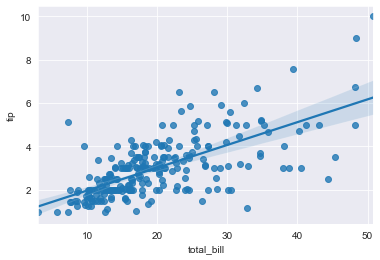

In [62]:


ax = sns.regplot(x='total_bill', y='tip', data=df)

ax1.set_title('Scatter Plot of Total Bill and Tip')
ax1.set_xlabel('Total Bill')
ax1.set_xlabel('Tip');


Alternative is to use `lmplot`<br>
`lmplot` calls `regplot`<br>
`lmplot` creates `figures`, `regplot` creates axes<br>

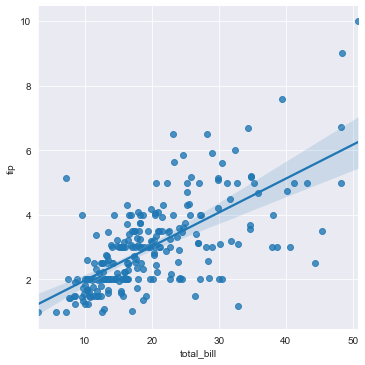

In [61]:
fig = sns.lmplot(x='total_bill', y='tip', data=df)


Or use `jointplot`<br>
`jointplot` creates a scatter that includes a univariate plot on each axis<br>
`jointplot` does not return axes, so no need to create a figure<br>
`jointplot` creates a `JointGrid` object

In [ ]:
joint_grid = sns.jointplot(x='total_bill', y='tip', data=df)
joint_grid.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint_grid.fig.suptitle(t='Joint Plot of Total Bill and Tip', fontsize=12, y=1.03);

# Hexbins

- Group points on a scatter plit into larger points.
- In the same way that a `histogram` can bin a variable to create a `bar`
- `hexbin` can bin variables to create hexagons

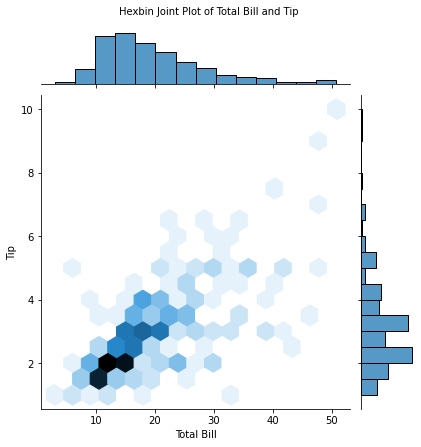

In [50]:
hexbin = sns.jointplot(x="total_bill", y='tip', data=df, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle(t='Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03);

# 2D Density Plots

- similar to `sns.kdeplot`
- Create a density plot across a bivariate (2 variables)
- Can show just the bivariate
- or show the invividual univariates

In [ ]:
# Just the bivariate
kde, ax1 = plt.subplots()

ax1 = sns.kdeplot(x=df['total_bill'], y=df['tip'], shade=False) # toggle shade True/False
ax1.set_title('Kernel Density Plot of Total Bill & Tip')
ax1.set_xlabel("Total Bill")
ax1.set_ylabel('Tip');

In [ ]:
# Include the univariates
kde_joint = sns.jointplot(x='total_bill', y='tip', data=df, kind='kde')

# Bar Plots
Default is to calculate the `mean`<br>
Use the `estimator` parameter to pass in any function<br>

In [ ]:
ax1 = sns.barplot(x='time', y='total_bill', data=df)
ax1.set_title('Bar plot of average total bill for time of day')
ax1.set_xlabel('Time of day')
ax1.set_ylabel('Average total bill');

## Box Plots

- Use to show multiple statistics<br>
- e.g. quartiles, max, min, outliers etc

In [ ]:
ax1 = sns.boxplot(x='time', y='total_bill', data=df)
ax1.set_title('Box plot of total bill by time of day')
ax1.set_xlabel('Time of day')
ax1.set_ylabel('Total bill')

## Violin Plot

Include the distribution of the data

Text(0, 0.5, 'Total bill')

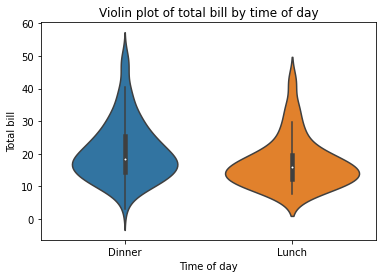

In [51]:
ax1 = sns.violinplot(x='time', y='total_bill', data=df)
ax1.set_title('Violin plot of total bill by time of day')
ax1.set_xlabel('Time of day')
ax1.set_ylabel('Total bill')

## Pairwise Plots

- `pairplot` visualizes **ALL** pairwise relationships 
- Creates lots of redundant information
- Use `PairGrid` and manually assign plots for the top hald and bottom half

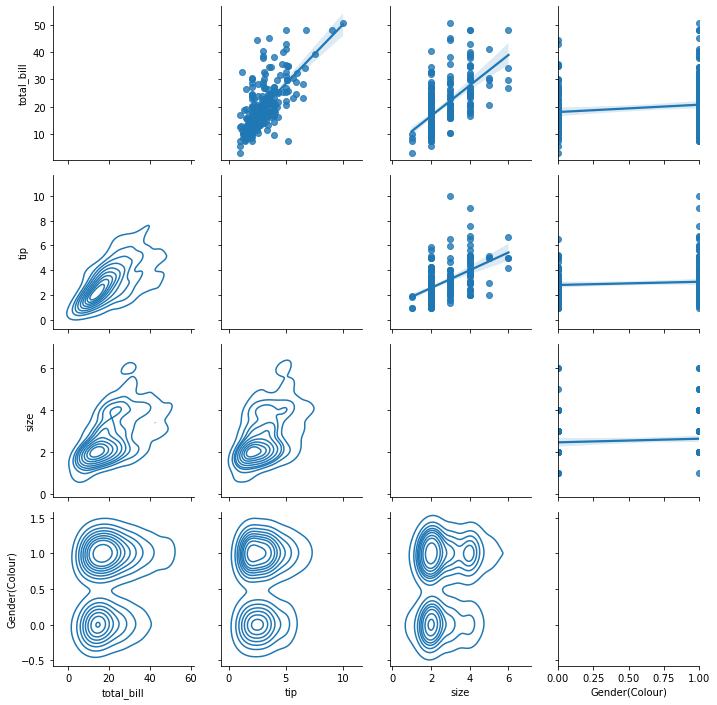

In [52]:
pair_grid = sns.PairGrid(data = df)

pair_grid = pair_grid.map_upper(sns.regplot) # or use plt.scatter
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

plt.show()

## Multivariate Data & Colours

No standard way to show this.

Use colours to distinguish bewteen gender in previous example

Using violin plot with and without `split` parameter

In [ ]:
ax1 = sns.violinplot(x='time', y='total_bill', data=df, hue='sex')

plt.show()

In [ ]:
ax1 = sns.violinplot(x='time', y='total_bill', data=df, hue='sex', split=True)

plt.show()

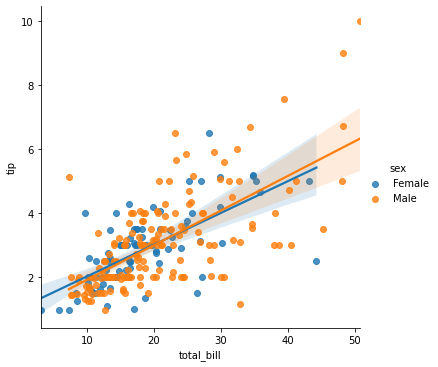

In [53]:
scatter = sns.lmplot(x='total_bill', y='tip', data=df, hue='sex', fit_reg=True)

# Seaborn Styles

Seaborn comes with some inbuilt styles.

To use these, call the `sns.set_style` once (usually at the top of your code)

Common styles are darkgrid, whitegrid, dark, white, ticks

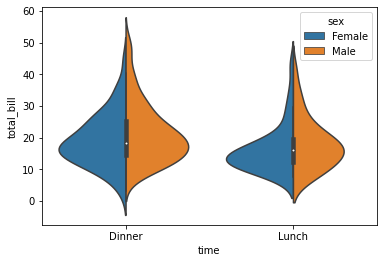

In [54]:
# Default Style
fig, ax1 = plt.subplots()

ax1 = sns.violinplot(x='time', y='total_bill', hue='sex', data=df, split=True)

plt.show()

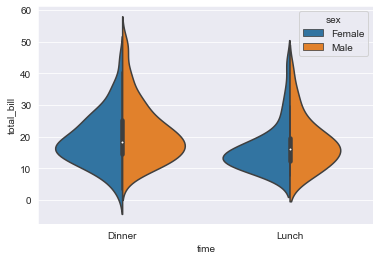

In [55]:
# Darkgrid
sns.set_style('darkgrid')

fig, ax1 = plt.subplots()

ax1 = sns.violinplot(x='time', y='total_bill', hue='sex', data=df, split=True)

plt.show()

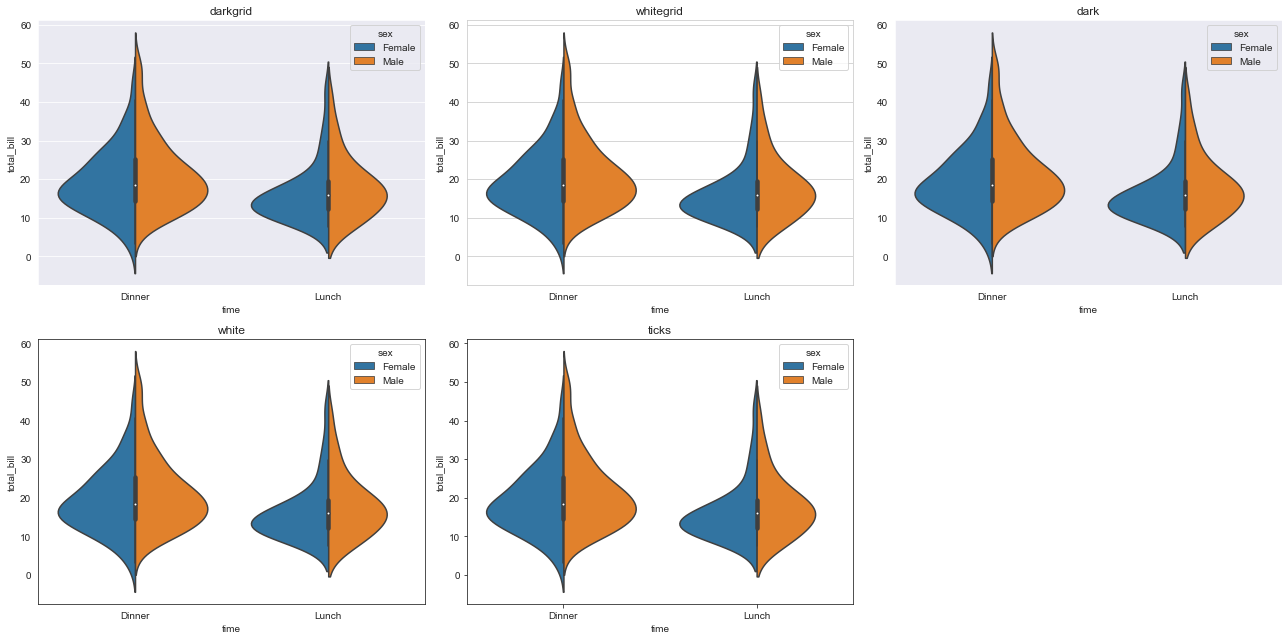

In [56]:
# Show a few styles

fig = plt.figure(figsize=(18,9))

styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2,3,plot_position)
        violin = sns.violinplot(x='time', y='total_bill', hue='sex', data=df, split=True)
        violin.set_title(style)

fig.tight_layout()
plt.show()

# Plotly

In [57]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group", facet_row="time", facet_col="day",
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
fig.show()

In [58]:
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")
fig.show()

In [59]:
df["size"] = df["size"].astype(str)
fig = px.scatter(df, x="total_bill", y="tip", color="size",
                 title="String 'size' values mean discrete colors")

fig.show()

In [60]:
df["size"] = df["size"].astype(int)
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", symbol="sex",size='size')
fig.show()